<a href="https://colab.research.google.com/github/Sanjay7231/Machine_learning_CH.SC.U4CSE23251/blob/Lab-Experiments/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']

In [ ]:
data = pd.read_csv('diabetes.csv', header=0, names=col_names)
print("Dataset Shape:", data.shape)
data.head()
print(data.isnull().sum())

Dataset Shape: (768, 9)
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = data[feature_cols]
y = data.label
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

x_train: (537, 7)
y_train: (537,)
x_test : (231, 7)
y_test : (231,)


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model_rbf = SVC(kernel='rbf', random_state=0)
model_rbf.fit(x_train, y_train)
svc_prediction_rbf = model_rbf.predict(x_test)

print("svc_prediction (rbf): ", svc_prediction_rbf)

svc_prediction (rbf):  [0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 1 1 0 1]


SVC [kernel = rbf]
Confusion Matrix:
 [[100  15]
 [  8 108]]
Accuracy Score: 0.9004329004329005
Accuracy in Percentage: 90 %
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       115
           1       0.88      0.93      0.90       116

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231



[Text(0.5, 1.0, 'SVC [rbf]')]

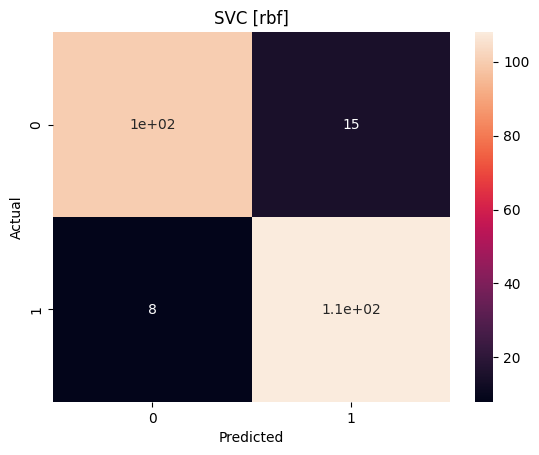

In [ ]:
conf_mat_rbf = metrics.confusion_matrix(y_test, svc_prediction_rbf)
print("SVC [kernel = rbf]")
print("Confusion Matrix:\n", conf_mat_rbf)
print("Accuracy Score:", accuracy_score(y_test, svc_prediction_rbf))
print("Accuracy in Percentage:", int(accuracy_score(y_test, svc_prediction_rbf) * 100), "%")
print(classification_report(y_test, svc_prediction_rbf))

sn.heatmap(pd.crosstab(y_test, svc_prediction_rbf, rownames=['Actual'], colnames=['Predicted']), annot=True).set(title="SVC [rbf]")

In [ ]:
model_linear = SVC(kernel='linear', random_state=0)
model_linear.fit(x_train, y_train)
svc_prediction_linear = model_linear.predict(x_test)

print("svc_prediction (linear): ", svc_prediction_linear)

svc_prediction (linear):  [0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 1]


SVC [kernel = linear]
Confusion Matrix:
 [[83 32]
 [25 91]]
Accuracy Score: 0.7532467532467533
Accuracy in Percentage: 75 %
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       115
           1       0.74      0.78      0.76       116

    accuracy                           0.75       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.75      0.75      0.75       231



[Text(0.5, 1.0, 'SVC [linear]')]

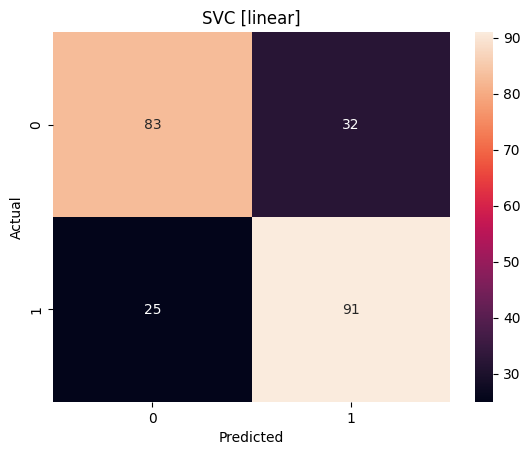

In [ ]:
conf_mat_linear = metrics.confusion_matrix(y_test, svc_prediction_linear)
print("SVC [kernel = linear]")
print("Confusion Matrix:\n", conf_mat_linear)
print("Accuracy Score:", accuracy_score(y_test, svc_prediction_linear))
print("Accuracy in Percentage:", int(accuracy_score(y_test, svc_prediction_linear) * 100), "%")
print(classification_report(y_test, svc_prediction_linear))
sn.heatmap(pd.crosstab(y_test, svc_prediction_linear, rownames=['Actual'], colnames=['Predicted']), annot=True).set(title="SVC [linear]")

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

col_names = None
data = pd.read_csv(url, header=None)

col_names = []
with pd.io.common.urlopen(names_url) as f:
    for line in f:
        decoded = line.decode('utf-8')
        if decoded.startswith('word_freq') or decoded.startswith('char_freq') or decoded.startswith('capital_run_length') or decoded.strip().startswith('spam'):
            name = decoded.split(':')[0].strip()
            col_names.append(name)
if len(col_names) == data.shape[1] - 1:
    col_names.append('spam')
elif len(col_names) == data.shape[1]:
    pass
else:
    col_names = ["f" + str(i) for i in range(data.shape[1])]
    col_names[-1] = 'spam'

data.columns = col_names

print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...      

In [ ]:
X = data.drop('spam', axis=1)
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.9268645908761767

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       804
           1       0.93      0.89      0.91       577

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



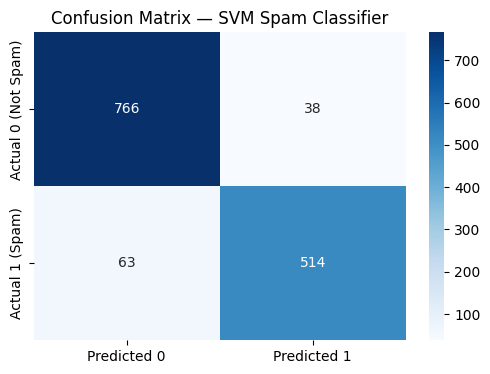

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0 (Not Spam)', 'Actual 1 (Spam)'],
                     columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(6,4))
sn.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix — SVM Spam Classifier")
plt.show()


/tmp/ipython-input-2299935298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='spam', data=data, palette="Set2")


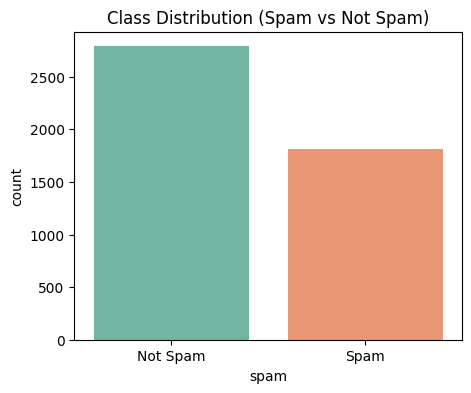

In [ ]:
plt.figure(figsize=(5,4))
sn.countplot(x='spam', data=data, palette="Set2")
plt.title("Class Distribution (Spam vs Not Spam)")
plt.xticks([0,1], ["Not Spam", "Spam"])
plt.show()

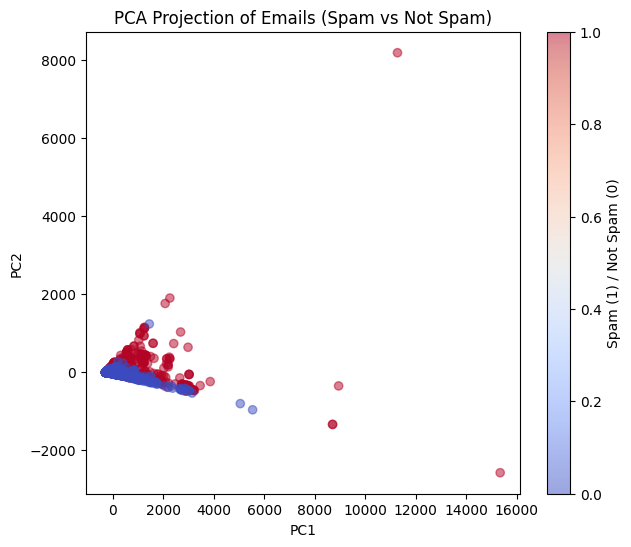

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.5)
plt.title("PCA Projection of Emails (Spam vs Not Spam)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Spam (1) / Not Spam (0)")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd

In [ ]:
np.random.seed(42)
X = np.random.uniform(-3, 3, (500, 2))
y = (X[:, 1] > X[:, 0]**2).astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
model = SVC(kernel='rbf', random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Accuracy in Percentage:", int(accuracy_score(y_test, y_pred) * 100), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[122   0]
 [  1  27]]
Accuracy Score: 0.9933333333333333
Accuracy in Percentage: 99 %

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



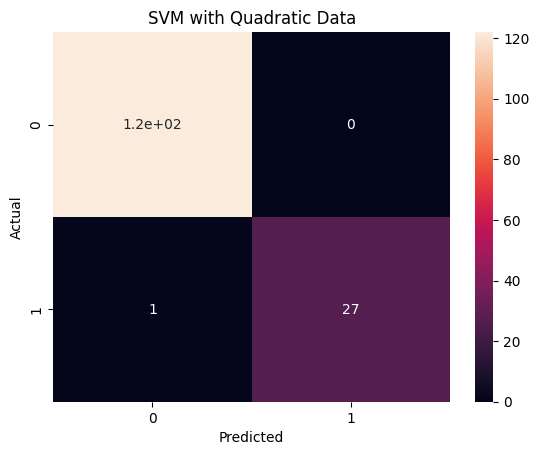

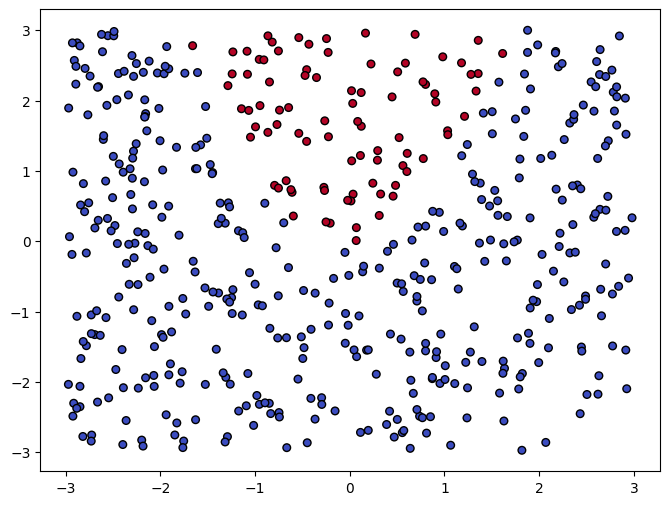

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title="SVM with Quadratic Data")
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')

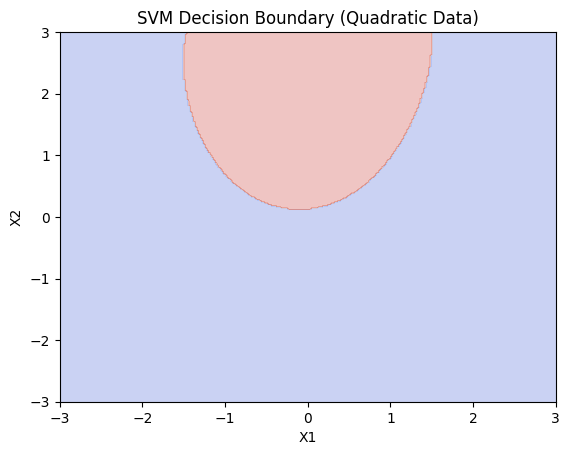

In [ ]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 300), np.linspace(-3, 3, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("SVM Decision Boundary (Quadratic Data)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()